In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors
import random

In [111]:
df = pd.read_csv("data/Mall_Customers.csv", index_col="CustomerID")
df = pd.get_dummies(df).drop("Gender_Male", axis=1)
df

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female
CustomerID                                                                
1            19                  15                      39              0
2            21                  15                      81              0
3            20                  16                       6              1
4            23                  16                      77              1
5            31                  17                      40              1
...         ...                 ...                     ...            ...
196          35                 120                      79              1
197          45                 126                      28              1
198          32                 126                      74              0
199          32                 137                      18              0
200          30                 137                      83              0

[200 rows x 4 columns]

In [113]:
def get_closest_cluster(points, cluster_centers, dist_metric="L2"):
    # When dist_metric is L1, we apply L1 norm
    if dist_metric == "L1":
        order = 1
    else:
        # Default distance metric for np.linalg.norm is L2
        order = None
    return np.argmin([np.linalg.norm(points - x, axis=1, ord=order) for x in cluster_centers], axis=0)


# Given the data points and their cluster assignments, this function adjusts the cluster centers
def get_new_cluster_centers(points, cluster_assn, cluster_centers, dist_metric="L2"):
    # List of numpy arrays representing each pixel in each cluster
    data = [points[np.where(cluster_assn == x)] for x in range(len(cluster_centers))]

    # Only re-adjusting cluster centers for non-empty clusters, removing empty ones
    # by checking if len(data belonging to cluster x) > 0

    # If distance metric is L1, we use the k-median function
    if dist_metric == "L1":
        new_cluster_centers = np.array([x.median(axis=0) for x in data if len(x) > 0])
    else:
        # Otherwise, we use k-means function
        new_cluster_centers = np.array([x.mean(axis=0) for x in data if len(x) > 0])
    return new_cluster_centers


# Runs k-means algorithm on pixels
def kmeans_run(points, K, dist_metric="L2"):
    # np.random.seed(42)

    # Random initialization of K data points to be cluster centers
    old_cluster_centers = points[np.random.choice(len(points), K, replace=False)]

    # Assign each pixel to its nearest cluster
    cluster_assns = get_closest_cluster(points, old_cluster_centers, dist_metric)

    # Number of iterations, i
    i = 1

    # Do until cluster centers do not change
    while True:

        # For each cluster, calculate the new cluster centroid to be the mean
        cluster_centers = get_new_cluster_centers(points, cluster_assns, old_cluster_centers, dist_metric)

        # Assign each point to the closest cluster center
        cluster_assns = get_closest_cluster(points, cluster_centers, dist_metric)

        # Check if the cluster centers have changed; If yes, algorithm has reached convergence
        if (cluster_centers.size == old_cluster_centers.size) and (
                np.equal(cluster_centers, old_cluster_centers).sum() == old_cluster_centers.size):
            break
        i += 1

        # Storing cluster centers in variable old_cluster_centers for comparison later
        old_cluster_centers = cluster_centers

    # Only returning non-empty clusters. If an empty cluster was deleted, send a message to the user;
    k = len(cluster_centers)
    if K > k:
        print(f"Current value of K producing empty cluster. Reducing K from {K} to {k}")
    return cluster_assns, cluster_centers, i, k

# With Gender

In [112]:
data = np.array(df)

In [114]:
K=4
kmeans_run(data, K)

(array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
        2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
        2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
        2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
        3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2,
        2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1]),
 array([[40.39473684, 87.        , 18.63157895,  0.47368421],
        [32.875     , 86.1       , 81.525     ,  0.55      ],
        [50.60810811, 46.58108108, 40.25675676,  0.60810811],
        [24.47916667, 39.89583333, 64.41666667,  0.5625    ]]),
 15,
 4)

In [115]:
cluster_assns, cluster_centers, i, k = kmeans_run(data, 4)

In [116]:
len(cluster_assns)

200

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca_model = PCA(2)

In [119]:
data = np.array(df)
reduced_data = pca_model.fit_transform(data)

In [120]:
reduced_data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878331e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [121]:
cluster_assns

array([0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

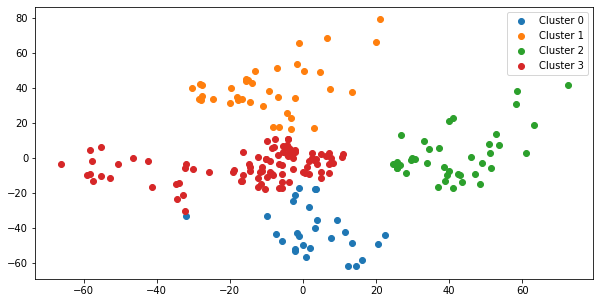

In [122]:
all_colors = list(mcolors.cnames.keys())
colors = random.sample(all_colors, len(cluster_centers))
plt.figure(figsize=(10,5))
for cluster in range(len(cluster_centers)):
    data = reduced_data[cluster_assns==cluster]
    plt.scatter(data[:,0], data[:,1], label=f"Cluster {cluster}")
plt.legend();

In [134]:
df['Gender_Female'].unique()

array([0, 1], dtype=uint8)

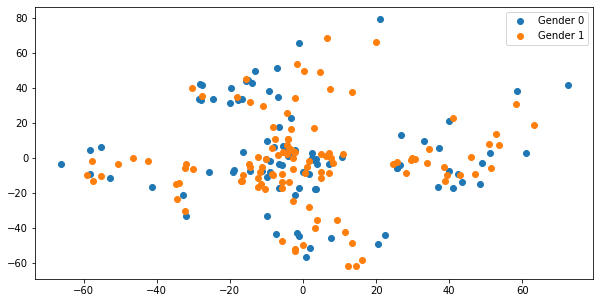

In [136]:
plt.figure(figsize=(10,5))
for gender in df['Gender_Female'].unique():
    data = reduced_data[df['Gender_Female']==gender]
    plt.scatter(data[:,0], data[:,1], label=f"Gender {gender}")
plt.legend();

# Without Gender

In [123]:
data = np.array(df.drop("Gender_Female", axis=1))

In [124]:
K=4
kmeans_run(data, K)

(array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
        3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1]),
 array([[40.39473684, 87.        , 18.63157895],
        [32.69230769, 86.53846154, 82.12820513],
        [24.82142857, 28.71428571, 74.25      ],
        [44.89473684, 48.70526316, 42.63157895]]),
 10,
 4)

In [125]:
cluster_assns, cluster_centers, i, k = kmeans_run(data, 4)

In [126]:
len(cluster_assns)

200

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca_model = PCA(2)

In [129]:
data = np.array(df)
reduced_data = pca_model.fit_transform(data)

In [130]:
reduced_data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878331e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [131]:
cluster_assns

array([0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

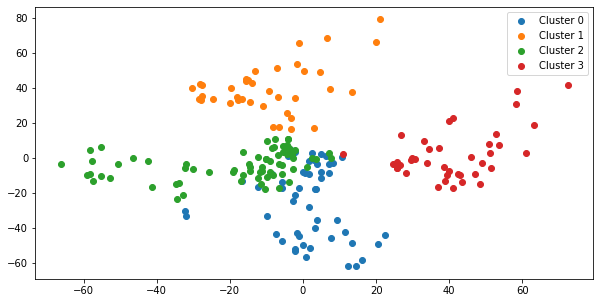

In [132]:
all_colors = list(mcolors.cnames.keys())
colors = random.sample(all_colors, len(cluster_centers))
plt.figure(figsize=(10,5))
for cluster in range(len(cluster_centers)):
    data = reduced_data[cluster_assns==cluster]
    plt.scatter(data[:,0], data[:,1], label=f"Cluster {cluster}")
plt.legend();

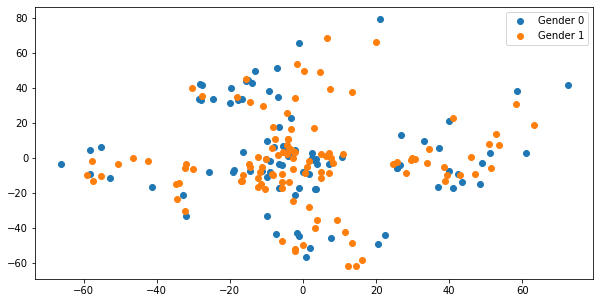

In [137]:
plt.figure(figsize=(10,5))
for gender in df['Gender_Female'].unique():
    data = reduced_data[df['Gender_Female']==gender]
    plt.scatter(data[:,0], data[:,1], label=f"Gender {gender}")
plt.legend();